In [27]:
#@author salvatore patrick

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

scores2015 = pd.read_csv('sp_500_esg_scores_2015.csv')
scores2016 = pd.read_csv('sp_500_esg_scores_2016.csv')
scores2017 = pd.read_csv('sp_500_esg_scores_2017.csv')
scores2018 = pd.read_csv('sp_500_esg_scores_2018.csv')

country = pd.read_csv('sp_500_headquarters_country.csv')
income = pd.read_csv('sp_500_income.csv')
assets = pd.read_csv('sp_500_total_assets_reported.csv')
debt = pd.read_csv('sp_500_total_debt.csv')
sector = pd.read_csv('sp_500_sector.csv')

volatility = pd.read_csv('sp_500_volatility_200_days.csv')
YTD_total_return = pd.read_csv('sp_500_ytd_total_return.csv')
revenue = pd.read_csv('sp_500_total_revenue.csv')
equity_and_liabilities = pd.read_csv('sp_500_total_liabilities_shareholders_equity.csv')
MKT_CAP = pd.read_csv('sp_500_company_market_capitalization.csv')


In [28]:
combined_df=pd.DataFrame()
combined_df['Symbol']=scores2015['Instrument']

combined_df['Country']=country['Country of Headquarters']

combined_df['GICS Sector Name']=sector['GICS Sector Name']

combined_df['2015 ESG Score']=scores2015['ESG Score']
combined_df['2016 ESG Score']=scores2016['ESG Score']
combined_df['2017 ESG Score']=scores2017['ESG Score']
combined_df['2018 ESG Score']=scores2018['ESG Score']

combined_df['2015 Market Cap']=MKT_CAP['2015']
combined_df['2016 Market Cap']=MKT_CAP['2016']
combined_df['2017 Market Cap']=MKT_CAP['2017']
combined_df['2018 Market Cap']=MKT_CAP['2018']

combined_df['2015 Assets']=assets['2015']
combined_df['2016 Assets']=assets['2016']
combined_df['2017 Assets']=assets['2017']
combined_df['2018 Assets']=assets['2018']

combined_df['2015 Debt']=debt['2015']
combined_df['2016 Debt']=debt['2016']
combined_df['2017 Debt']=debt['2017']
combined_df['2018 Debt']=debt['2018']

combined_df['volatility_200D']=volatility['Volatility - 200 days']

combined_df['2015 YTD total returns']=YTD_total_return['2015']
combined_df['2016 YTD total returns']=YTD_total_return['2016']
combined_df['2017 YTD total returns']=YTD_total_return['2017']
combined_df['2018 YTD total returns']=YTD_total_return['2018']

combined_df['2015 Equity_and_Liabilities']=equity_and_liabilities['2015']
combined_df['2016 Equity_and_Liabilities']=equity_and_liabilities['2016']
combined_df['2017 Equity_and_Liabilities']=equity_and_liabilities['2017']
combined_df['2018 Equity_and_Liabilities']=equity_and_liabilities['2018']

combined_df['2015 Income']=income['2015']
combined_df['2016 Income']=income['2016']
combined_df['2017 Income']=income['2017']
combined_df['2018 Income']=income['2018']

combined_df['2015 Revenue']=revenue['2015']
combined_df['2016 Revenue']=revenue['2016']
combined_df['2017 Revenue']=revenue['2017']
combined_df['2018 Revenue']=revenue['2018']

combined_df=combined_df.dropna() 

In [29]:
combined_df['Country'].unique()

array(['United States of America', 'Ireland; Republic of', 'Bermuda',
       'Switzerland', 'United Kingdom', 'Netherlands'], dtype=object)

In [30]:
list(combined_df.columns)

['Symbol',
 'Country',
 'GICS Sector Name',
 '2015 ESG Score',
 '2016 ESG Score',
 '2017 ESG Score',
 '2018 ESG Score',
 '2015 Market Cap',
 '2016 Market Cap',
 '2017 Market Cap',
 '2018 Market Cap',
 '2015 Assets',
 '2016 Assets',
 '2017 Assets',
 '2018 Assets',
 '2015 Debt',
 '2016 Debt',
 '2017 Debt',
 '2018 Debt',
 'volatility_200D',
 '2015 YTD total returns',
 '2016 YTD total returns',
 '2017 YTD total returns',
 '2018 YTD total returns',
 '2015 Equity_and_Liabilities',
 '2016 Equity_and_Liabilities',
 '2017 Equity_and_Liabilities',
 '2018 Equity_and_Liabilities',
 '2015 Income',
 '2016 Income',
 '2017 Income',
 '2018 Income',
 '2015 Revenue',
 '2016 Revenue',
 '2017 Revenue',
 '2018 Revenue']

In [31]:
USA_df=combined_df.loc[combined_df['Country'] == 'United States of America']
Ireland_df=combined_df.loc[combined_df['Country'] == 'Ireland; Republic of']
Bermuda_df=combined_df.loc[combined_df['Country'] == 'Bermuda']
Switzerland_df=combined_df.loc[combined_df['Country'] == 'Switzerland']
UK_df=combined_df.loc[combined_df['Country'] == 'United Kingdom']
Netherlands_df=combined_df.loc[combined_df['Country'] == 'Netherlands']

In [32]:
combined_df2=pd.DataFrame()

combined_df2['Symbol']=combined_df['Symbol']

combined_df2['volatility']=combined_df['volatility_200D']

combined_df2['annual total returns']=(
combined_df['2015 YTD total returns']+
combined_df['2016 YTD total returns']+
combined_df['2017 YTD total returns']+
combined_df['2018 YTD total returns'])/4

combined_df2["Tobin's Q"]=(
combined_df['2015 Equity_and_Liabilities']+
combined_df['2016 Equity_and_Liabilities']+
combined_df['2017 Equity_and_Liabilities']+
combined_df['2018 Equity_and_Liabilities']+
combined_df['2015 Market Cap']+
combined_df['2016 Market Cap']+
combined_df['2017 Market Cap']+
combined_df['2018 Market Cap']
)/(
combined_df['2015 Assets']+
combined_df['2016 Assets']+
combined_df['2017 Assets']+
combined_df['2018 Assets']
)

combined_df2['log assets']=np.log((
combined_df['2015 Assets']+
combined_df['2016 Assets']+
combined_df['2017 Assets']+
combined_df['2018 Assets'])/4)

combined_df2['debt to assets']=((
combined_df['2015 Debt']+
combined_df['2016 Debt']+
combined_df['2017 Debt']+
combined_df['2018 Debt']
)/(
combined_df['2015 Assets']+
combined_df['2016 Assets']+
combined_df['2017 Assets']+
combined_df['2018 Assets']))

combined_df2['ESG score']=(
(combined_df['2015 ESG Score']+
combined_df['2016 ESG Score']+
combined_df['2017 ESG Score']+
combined_df['2018 ESG Score'])/4)

combined_df2

,Symbol,volatility,annual total returns,Tobin's Q,log assets,debt to assets,ESG score
0,MMM,29.128061,8.454232,4.209414,10.465073,0.365308,86.965127
1,AOS,32.617771,15.954938,3.779752,7.988636,0.102162,36.826891
2,ABT,27.784550,17.654153,2.474349,10.990938,0.326979,79.772124
3,ABBV.K,24.019274,15.641209,2.972307,11.040066,0.586437,74.500785
5,ACN,33.266064,15.248434,4.415565,10.101701,0.001025,81.407311
...,...,...,...,...,...,...,...
497,XYL,37.207381,18.369079,2.572971,8.748821,0.323246,71.764948
498,YUM,25.369920,17.910072,5.447967,8.654997,1.434502,72.542819
499,ZBRA.O,49.452897,21.885402,2.217031,8.427597,0.518320,27.129276
500,ZBH,32.401016,-0.696409,1.813200,10.165715,0.402030,43.280028


In [33]:
USA_df2=pd.DataFrame()

USA_df2['Symbol']=USA_df['Symbol']

USA_df2['volatility']=USA_df['volatility_200D']

USA_df2['annual total returns']=(
USA_df['2015 YTD total returns']+
USA_df['2016 YTD total returns']+
USA_df['2017 YTD total returns']+
USA_df['2018 YTD total returns'])/4

USA_df2["Tobin's Q"]=(
USA_df['2015 Equity_and_Liabilities']+
USA_df['2016 Equity_and_Liabilities']+
USA_df['2017 Equity_and_Liabilities']+
USA_df['2018 Equity_and_Liabilities']+
USA_df['2015 Market Cap']+
USA_df['2016 Market Cap']+
USA_df['2017 Market Cap']+
USA_df['2018 Market Cap']
)/(
USA_df['2015 Assets']+
USA_df['2016 Assets']+
USA_df['2017 Assets']+
USA_df['2018 Assets']
)

USA_df2['log assets']=np.log((
USA_df['2015 Assets']+
USA_df['2016 Assets']+
USA_df['2017 Assets']+
USA_df['2018 Assets'])/4)

USA_df2['debt to assets']=((
USA_df['2015 Debt']+
USA_df['2016 Debt']+
USA_df['2017 Debt']+
USA_df['2018 Debt']
)/(
USA_df['2015 Assets']+
USA_df['2016 Assets']+
USA_df['2017 Assets']+
USA_df['2018 Assets']))

USA_df2['ESG score']=(
(USA_df['2015 ESG Score']+
USA_df['2016 ESG Score']+
USA_df['2017 ESG Score']+
USA_df['2018 ESG Score'])/4)

USA_df2


,Symbol,volatility,annual total returns,Tobin's Q,log assets,debt to assets,ESG score
0,MMM,29.128061,8.454232,4.209414,10.465073,0.365308,86.965127
1,AOS,32.617771,15.954938,3.779752,7.988636,0.102162,36.826891
2,ABT,27.784550,17.654153,2.474349,10.990938,0.326979,79.772124
3,ABBV.K,24.019274,15.641209,2.972307,11.040066,0.586437,74.500785
6,ATVI.O,12.882543,34.612280,3.000593,9.759271,0.231345,51.509217
...,...,...,...,...,...,...,...
497,XYL,37.207381,18.369079,2.572971,8.748821,0.323246,71.764948
498,YUM,25.369920,17.910072,5.447967,8.654997,1.434502,72.542819
499,ZBRA.O,49.452897,21.885402,2.217031,8.427597,0.518320,27.129276
500,ZBH,32.401016,-0.696409,1.813200,10.165715,0.402030,43.280028


In [34]:
Ireland_df2=pd.DataFrame()

Ireland_df2['Symbol']=Ireland_df['Symbol']

Ireland_df2['volatility']=Ireland_df['volatility_200D']

Ireland_df2['annual total returns']=(
Ireland_df['2015 YTD total returns']+
Ireland_df['2016 YTD total returns']+
Ireland_df['2017 YTD total returns']+
Ireland_df['2018 YTD total returns'])/4

Ireland_df2["Tobin's Q"]=(
Ireland_df['2015 Equity_and_Liabilities']+
Ireland_df['2016 Equity_and_Liabilities']+
Ireland_df['2017 Equity_and_Liabilities']+
Ireland_df['2018 Equity_and_Liabilities']+
Ireland_df['2015 Market Cap']+
Ireland_df['2016 Market Cap']+
Ireland_df['2017 Market Cap']+
Ireland_df['2018 Market Cap']
)/(
Ireland_df['2015 Assets']+
Ireland_df['2016 Assets']+
Ireland_df['2017 Assets']+
Ireland_df['2018 Assets']
)

Ireland_df2['log assets']=np.log((
Ireland_df['2015 Assets']+
Ireland_df['2016 Assets']+
Ireland_df['2017 Assets']+
Ireland_df['2018 Assets'])/4)

Ireland_df2['debt to assets']=((
Ireland_df['2015 Debt']+
Ireland_df['2016 Debt']+
Ireland_df['2017 Debt']+
Ireland_df['2018 Debt']
)/(
Ireland_df['2015 Assets']+
Ireland_df['2016 Assets']+
Ireland_df['2017 Assets']+
Ireland_df['2018 Assets']))

Ireland_df2['ESG score']=(
(Ireland_df['2015 ESG Score']+
Ireland_df['2016 ESG Score']+
Ireland_df['2017 ESG Score']+
Ireland_df['2018 ESG Score'])/4)

Ireland_df2

,Symbol,volatility,annual total returns,Tobin's Q,log assets,debt to assets,ESG score
5,ACN,33.266064,15.248434,4.415565,10.101701,0.001025,81.407311
20,ALLE.K,33.455140,10.982421,3.799058,7.810211,0.599132,42.601191
43,AON,29.689393,13.002879,2.161197,10.184975,0.233369,49.271179
47,APTV.K,55.447577,6.243160,2.516205,9.411525,0.336591,46.779134
164,ETN,29.632328,6.138519,1.950240,10.351270,0.255322,70.544059
266,JCI,34.559922,-1.968254,1.547751,10.850050,0.215768,80.804412
308,MDT,25.678503,8.563632,2.148746,11.463178,0.303804,70.779200
412,STX.O,43.428838,-3.776596,2.267723,9.098738,0.508274,60.329006
450,TT,31.684867,11.021642,1.867630,9.772855,0.234224,69.515517


In [35]:
Bermuda_df2=pd.DataFrame()

Bermuda_df2['Symbol']=Bermuda_df['Symbol']

Bermuda_df2['volatility']=Bermuda_df['volatility_200D']

Bermuda_df2['annual total returns']=(
Bermuda_df['2015 YTD total returns']+
Bermuda_df['2016 YTD total returns']+
Bermuda_df['2017 YTD total returns']+
Bermuda_df['2018 YTD total returns'])/4

Bermuda_df2["Tobin's Q"]=(
Bermuda_df['2015 Equity_and_Liabilities']+
Bermuda_df['2016 Equity_and_Liabilities']+
Bermuda_df['2017 Equity_and_Liabilities']+
Bermuda_df['2018 Equity_and_Liabilities']+
Bermuda_df['2015 Market Cap']+
Bermuda_df['2016 Market Cap']+
Bermuda_df['2017 Market Cap']+
Bermuda_df['2018 Market Cap']
)/(
Bermuda_df['2015 Assets']+
Bermuda_df['2016 Assets']+
Bermuda_df['2017 Assets']+
Bermuda_df['2018 Assets']
)

Bermuda_df2['log assets']=np.log((
Bermuda_df['2015 Assets']+
Bermuda_df['2016 Assets']+
Bermuda_df['2017 Assets']+
Bermuda_df['2018 Assets'])/4)

Bermuda_df2['debt to assets']=((
Bermuda_df['2015 Debt']+
Bermuda_df['2016 Debt']+
Bermuda_df['2017 Debt']+
Bermuda_df['2018 Debt']
)/(
Bermuda_df['2015 Assets']+
Bermuda_df['2016 Assets']+
Bermuda_df['2017 Assets']+
Bermuda_df['2018 Assets']))

Bermuda_df2['ESG score']=(
(Bermuda_df['2015 ESG Score']+
Bermuda_df['2016 ESG Score']+
Bermuda_df['2017 ESG Score']+
Bermuda_df['2018 ESG Score'])/4)

Bermuda_df2

,Symbol,volatility,annual total returns,Tobin's Q,log assets,debt to assets,ESG score
48,ACGL.O,29.511655,8.809141,1.357591,10.282090,0.073180,28.981320
184,RE,30.702708,9.049104,1.384345,10.023598,0.028081,40.146401


In [36]:
Switzerland_df2=pd.DataFrame()

Switzerland_df2['Symbol']=Switzerland_df['Symbol']

Switzerland_df2['volatility']=Switzerland_df['volatility_200D']

Switzerland_df2['annual total returns']=(
Switzerland_df['2015 YTD total returns']+
Switzerland_df['2016 YTD total returns']+
Switzerland_df['2017 YTD total returns']+
Switzerland_df['2018 YTD total returns'])/4

Switzerland_df2["Tobin's Q"]=(
Switzerland_df['2015 Equity_and_Liabilities']+
Switzerland_df['2016 Equity_and_Liabilities']+
Switzerland_df['2017 Equity_and_Liabilities']+
Switzerland_df['2018 Equity_and_Liabilities']+
Switzerland_df['2015 Market Cap']+
Switzerland_df['2016 Market Cap']+
Switzerland_df['2017 Market Cap']+
Switzerland_df['2018 Market Cap']
)/(
Switzerland_df['2015 Assets']+
Switzerland_df['2016 Assets']+
Switzerland_df['2017 Assets']+
Switzerland_df['2018 Assets']
)

Switzerland_df2['log assets']=np.log((
Switzerland_df['2015 Assets']+
Switzerland_df['2016 Assets']+
Switzerland_df['2017 Assets']+
Switzerland_df['2018 Assets'])/4)

Switzerland_df2['debt to assets']=((
Switzerland_df['2015 Debt']+
Switzerland_df['2016 Debt']+
Switzerland_df['2017 Debt']+
Switzerland_df['2018 Debt']
)/(
Switzerland_df['2015 Assets']+
Switzerland_df['2016 Assets']+
Switzerland_df['2017 Assets']+
Switzerland_df['2018 Assets']))

Switzerland_df2['ESG score']=(
(Switzerland_df['2015 ESG Score']+
Switzerland_df['2016 ESG Score']+
Switzerland_df['2017 ESG Score']+
Switzerland_df['2018 ESG Score'])/4)

Switzerland_df2

,Symbol,volatility,annual total returns,Tobin's Q,log assets,debt to assets,ESG score
107,CB,24.424280,5.651388,1.379847,11.913185,0.081917,46.995142
212,GRMN.K,32.744532,11.986334,3.032355,8.484446,0.000000,57.786317
440,TEL,34.699787,8.727183,2.413144,9.866447,0.212463,64.018950


In [37]:
UK_df2=pd.DataFrame()

UK_df2['Symbol']=UK_df['Symbol']

UK_df2['volatility']=UK_df['volatility_200D']

UK_df2['annual total returns']=(
UK_df['2015 YTD total returns']+
UK_df['2016 YTD total returns']+
UK_df['2017 YTD total returns']+
UK_df['2018 YTD total returns'])/4

UK_df2["Tobin's Q"]=(
UK_df['2015 Equity_and_Liabilities']+
UK_df['2016 Equity_and_Liabilities']+
UK_df['2017 Equity_and_Liabilities']+
UK_df['2018 Equity_and_Liabilities']+
UK_df['2015 Market Cap']+
UK_df['2016 Market Cap']+
UK_df['2017 Market Cap']+
UK_df['2018 Market Cap']
)/(
UK_df['2015 Assets']+
UK_df['2016 Assets']+
UK_df['2017 Assets']+
UK_df['2018 Assets']
)

UK_df2['log assets']=np.log((
UK_df['2015 Assets']+
UK_df['2016 Assets']+
UK_df['2017 Assets']+
UK_df['2018 Assets'])/4)

UK_df2['debt to assets']=((
UK_df['2015 Debt']+
UK_df['2016 Debt']+
UK_df['2017 Debt']+
UK_df['2018 Debt']
)/(
UK_df['2015 Assets']+
UK_df['2016 Assets']+
UK_df['2017 Assets']+
UK_df['2018 Assets']))

UK_df2['ESG score']=(
(UK_df['2015 ESG Score']+
UK_df['2016 ESG Score']+
UK_df['2017 ESG Score']+
UK_df['2018 ESG Score'])/4)

UK_df2

,Symbol,volatility,annual total returns,Tobin's Q,log assets,debt to assets,ESG score
294,LYB,35.859728,7.033874,2.417255,10.133438,0.347775,57.786220
367,PNR,34.648232,0.492586,1.780009,9.099646,0.312588,46.897434
493,WTW.O,26.461593,8.860244,1.570056,10.257089,0.142801,42.553290


In [38]:
Netherlands_df2=pd.DataFrame()

Netherlands_df2['Symbol']=Netherlands_df['Symbol']

Netherlands_df2['volatility']=Netherlands_df['volatility_200D']

Netherlands_df2['annual total returns']=(
Netherlands_df['2015 YTD total returns']+
Netherlands_df['2016 YTD total returns']+
Netherlands_df['2017 YTD total returns']+
Netherlands_df['2018 YTD total returns'])/4

Netherlands_df2["Tobin's Q"]=(
Netherlands_df['2015 Equity_and_Liabilities']+
Netherlands_df['2016 Equity_and_Liabilities']+
Netherlands_df['2017 Equity_and_Liabilities']+
Netherlands_df['2018 Equity_and_Liabilities']+
Netherlands_df['2015 Market Cap']+
Netherlands_df['2016 Market Cap']+
Netherlands_df['2017 Market Cap']+
Netherlands_df['2018 Market Cap']
)/(
Netherlands_df['2015 Assets']+
Netherlands_df['2016 Assets']+
Netherlands_df['2017 Assets']+
Netherlands_df['2018 Assets']
)

Netherlands_df2['log assets']=np.log((
Netherlands_df['2015 Assets']+
Netherlands_df['2016 Assets']+
Netherlands_df['2017 Assets']+
Netherlands_df['2018 Assets'])/4)

Netherlands_df2['debt to assets']=((
Netherlands_df['2015 Debt']+
Netherlands_df['2016 Debt']+
Netherlands_df['2017 Debt']+
Netherlands_df['2018 Debt']
)/(
Netherlands_df['2015 Assets']+
Netherlands_df['2016 Assets']+
Netherlands_df['2017 Assets']+
Netherlands_df['2018 Assets']))

Netherlands_df2['ESG score']=(
(Netherlands_df['2015 ESG Score']+
Netherlands_df['2016 ESG Score']+
Netherlands_df['2017 ESG Score']+
Netherlands_df['2018 ESG Score'])/4)

Netherlands_df2

,Symbol,volatility,annual total returns,Tobin's Q,log assets,debt to assets,ESG score
350,NXPI.O,46.502054,2.257435,2.309982,10.094428,0.333757,66.143527


In [39]:
combined_df2.describe()

,volatility,annual total returns,Tobin's Q,log assets,debt to assets,ESG score
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,36.927471,10.886373,2.896075,9.787692,0.320136,57.150584
std,11.734911,12.548755,2.215360,1.314377,0.238878,16.726686
min,12.882543,-21.380279,1.050635,6.329656,0.000000,12.868309
25%,28.132993,2.910371,1.731133,8.899747,0.202259,45.473879
50%,34.647783,10.438735,2.278656,9.759450,0.312482,59.077214
75%,42.979544,17.544465,3.249283,10.567745,0.418813,69.493181
max,100.593785,93.209282,27.210654,13.701819,3.408933,92.046198


In [40]:
USA_df2.describe()

,volatility,annual total returns,Tobin's Q,log assets,debt to assets,ESG score
count,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000
mean,37.047145,11.041136,2.923102,9.780780,0.323665,57.162874
std,11.862863,12.741772,2.250647,1.327063,0.240917,16.818703
min,12.882543,-21.380279,1.050635,6.329656,0.000000,12.868309
25%,28.131731,2.814351,1.731391,8.886052,0.203438,45.465304
50%,34.714471,10.610889,2.286658,9.738198,0.316877,59.164770
75%,43.113131,17.743087,3.292767,10.592162,0.423267,69.470845
max,100.593785,93.209282,27.210654,13.701819,3.408933,92.046198


In [41]:
Ireland_df2.describe()

,volatility,annual total returns,Tobin's Q,log assets,debt to assets,ESG score
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,35.204737,7.272871,2.519346,9.893834,0.298612,63.559001
std,9.008698,6.478415,0.952291,1.056843,0.173723,14.524708
min,25.678503,-3.776596,1.547751,7.810211,0.001025,42.601191
25%,29.689393,6.138519,1.950240,9.411525,0.233369,49.271179
50%,33.266064,8.563632,2.161197,10.101701,0.255322,69.515517
75%,34.559922,11.021642,2.516205,10.351270,0.336591,70.779200
max,55.447577,15.248434,4.415565,11.463178,0.599132,81.407311


In [42]:
Bermuda_df2.describe()

,volatility,annual total returns,Tobin's Q,log assets,debt to assets,ESG score
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,30.107182,8.929123,1.370968,10.152844,0.050630,34.563861
std,0.842201,0.169679,0.018918,0.182781,0.031890,7.894905
min,29.511655,8.809141,1.357591,10.023598,0.028081,28.981320
25%,29.809419,8.869132,1.364279,10.088221,0.039356,31.772590
50%,30.107182,8.929123,1.370968,10.152844,0.050630,34.563861
75%,30.404945,8.989114,1.377656,10.217467,0.061905,37.355131
max,30.702708,9.049104,1.384345,10.282090,0.073180,40.146401


In [43]:
Switzerland_df2.describe()

,volatility,annual total returns,Tobin's Q,log assets,debt to assets,ESG score
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,30.622866,8.788302,2.275115,10.088026,0.098127,56.266803
std,5.456428,3.167915,0.834856,1.725076,0.107155,8.613025
min,24.424280,5.651388,1.379847,8.484446,0.000000,46.995142
25%,28.584406,7.189286,1.896495,9.175447,0.040958,52.390730
50%,32.744532,8.727183,2.413144,9.866447,0.081917,57.786317
75%,33.722160,10.356759,2.722749,10.889816,0.147190,60.902634
max,34.699787,11.986334,3.032355,11.913185,0.212463,64.018950


In [44]:
UK_df2.describe()

,volatility,annual total returns,Tobin's Q,log assets,debt to assets,ESG score
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,32.323184,5.462235,1.922440,9.830058,0.267721,49.078981
std,5.112301,4.399655,0.441193,0.635569,0.109605,7.847287
min,26.461593,0.492586,1.570056,9.099646,0.142801,42.553290
25%,30.554913,3.763230,1.675032,9.616542,0.227694,44.725362
50%,34.648232,7.033874,1.780009,10.133438,0.312588,46.897434
75%,35.253980,7.947059,2.098632,10.195263,0.330181,52.341827
max,35.859728,8.860244,2.417255,10.257089,0.347775,57.786220


In [45]:
Netherlands_df2.describe()

,volatility,annual total returns,Tobin's Q,log assets,debt to assets,ESG score
count,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
mean,46.502054,2.257435,2.309982,10.094428,0.333757,66.143527
std,NaN,NaN,NaN,NaN,NaN,NaN
min,46.502054,2.257435,2.309982,10.094428,0.333757,66.143527
25%,46.502054,2.257435,2.309982,10.094428,0.333757,66.143527
50%,46.502054,2.257435,2.309982,10.094428,0.333757,66.143527
75%,46.502054,2.257435,2.309982,10.094428,0.333757,66.143527
max,46.502054,2.257435,2.309982,10.094428,0.333757,66.143527


<AxesSubplot:>

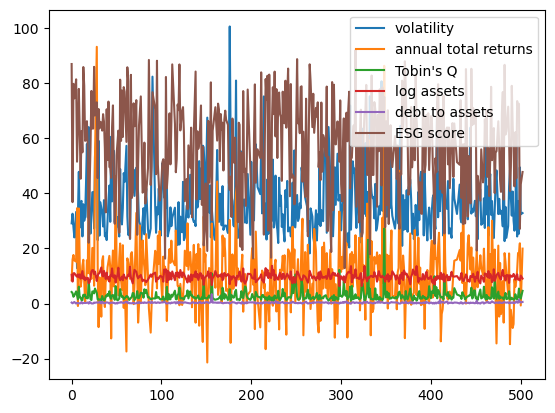

In [46]:
combined_df2.plot()

In [47]:
combined_df2.corr()

,volatility,annual total returns,Tobin's Q,log assets,debt to assets,ESG score
volatility,1.000000,0.125244,0.144889,-0.224229,-0.062516,-0.211222
annual total returns,0.125244,1.000000,0.466855,-0.330966,-0.030865,-0.165115
Tobin's Q,0.144889,0.466855,1.000000,-0.434234,0.003467,-0.117943
log assets,-0.224229,-0.330966,-0.434234,1.000000,-0.030332,0.433826
debt to assets,-0.062516,-0.030865,0.003467,-0.030332,1.000000,0.029445
ESG score,-0.211222,-0.165115,-0.117943,0.433826,0.029445,1.000000


array([[<AxesSubplot:xlabel='volatility', ylabel='volatility'>,
        <AxesSubplot:xlabel='annual total returns', ylabel='volatility'>,
        <AxesSubplot:xlabel="Tobin's Q", ylabel='volatility'>,
        <AxesSubplot:xlabel='log assets', ylabel='volatility'>,
        <AxesSubplot:xlabel='debt to assets', ylabel='volatility'>,
        <AxesSubplot:xlabel='ESG score', ylabel='volatility'>],
       [<AxesSubplot:xlabel='volatility', ylabel='annual total returns'>,
        <AxesSubplot:xlabel='annual total returns', ylabel='annual total returns'>,
        <AxesSubplot:xlabel="Tobin's Q", ylabel='annual total returns'>,
        <AxesSubplot:xlabel='log assets', ylabel='annual total returns'>,
        <AxesSubplot:xlabel='debt to assets', ylabel='annual total returns'>,
        <AxesSubplot:xlabel='ESG score', ylabel='annual total returns'>],
       [<AxesSubplot:xlabel='volatility', ylabel="Tobin's Q">,
        <AxesSubplot:xlabel='annual total returns', ylabel="Tobin's Q">,
        <A

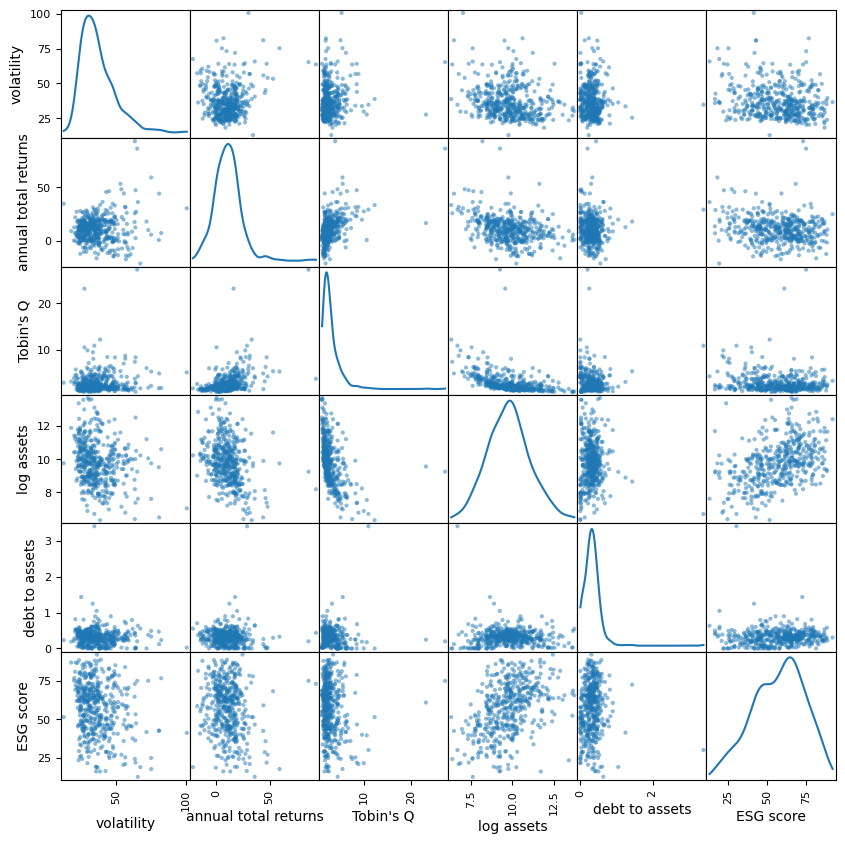

In [56]:
pd.plotting.scatter_matrix(combined_df2,figsize=(10,10),diagonal='kde')